# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy


  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=dee38222bc6a8cae9a90d148c58eb67ea74c58c1bacf594f22840445bea8c8c6
  Stored in directory: c:\users\frenci de la cruz\appdata\local\pip\cache\wheels\e9\27\5f\7defd70aaec29af33fe5e2110843e14dcfc44cba710a0dd957
Successfully built citipy


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
#build the format to ask the question
city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
weather_response = requests.get(city_url).json()
weather_response

{'coord': {'lon': -96.4667, 'lat': 15.7333},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 76.71,
  'feels_like': 78.55,
  'temp_min': 76.71,
  'temp_max': 76.71,
  'pressure': 1012,
  'humidity': 95,
  'sea_level': 1012,
  'grnd_level': 996},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 14, 'gust': 4.92},
 'rain': {'1h': 0.68},
 'clouds': {'all': 97},
 'dt': 1730167799,
 'sys': {'type': 2,
  'id': 2005410,
  'country': 'MX',
  'sunrise': 1730118077,
  'sunset': 1730159864},
 'timezone': -21600,
 'id': 3517970,
 'name': 'San Pedro Pochutla',
 'cod': 200}

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | cam ranh
Processing Record 3 of Set 1 | manokwari
Processing Record 4 of Set 1 | ayvacik
Processing Record 5 of Set 1 | porto novo
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | suwayr
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | baloda bazar
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | urangan
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | saint-georges
Processing Record 16 of Set 1 | yeppoon
Processing Record 17 of Set 1 | mossel bay
Processing Record 18 of Set 1 | afaahiti
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | east ballina
Processing Record 21 of Set 1 | luganville
Processing Record 22 of Set 1 | gua musang
Processing Re

In [8]:
print(city_weather)


{'coord': {'lon': -96.4667, 'lat': 15.7333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.84, 'feels_like': 25.86, 'temp_min': 24.84, 'temp_max': 24.84, 'pressure': 1012, 'humidity': 95, 'sea_level': 1012, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 14, 'gust': 2.2}, 'rain': {'1h': 0.68}, 'clouds': {'all': 97}, 'dt': 1730168560, 'sys': {'type': 2, 'id': 2005410, 'country': 'MX', 'sunrise': 1730118077, 'sunset': 1730159864}, 'timezone': -21600, 'id': 3517970, 'name': 'San Pedro Pochutla', 'cod': 200}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [12]:
city_data.__class__

list

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-0.13,97,100,2.66,GS,1730167799
1,cam ranh,11.9214,109.1591,27.98,74,40,1.54,VN,1730167800
2,manokwari,-0.8667,134.0833,29.23,74,69,5.62,ID,1730167801
3,ayvacik,39.6011,26.4047,11.58,45,0,2.50,TR,1730167803
4,porto novo,6.4965,2.6036,25.39,88,88,1.28,BJ,1730167804


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-0.13,97,100,2.66,GS,1730167799
1,cam ranh,11.9214,109.1591,27.98,74,40,1.54,VN,1730167800
2,manokwari,-0.8667,134.0833,29.23,74,69,5.62,ID,1730167801
3,ayvacik,39.6011,26.4047,11.58,45,0,2.50,TR,1730167803
4,porto novo,6.4965,2.6036,25.39,88,88,1.28,BJ,1730167804


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [17]:
 city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-0.13,97,100,2.66,GS,1730167799
1,cam ranh,11.9214,109.1591,27.98,74,40,1.54,VN,1730167800
2,manokwari,-0.8667,134.0833,29.23,74,69,5.62,ID,1730167801
3,ayvacik,39.6011,26.4047,11.58,45,0,2.50,TR,1730167803
4,porto novo,6.4965,2.6036,25.39,88,88,1.28,BJ,1730167804


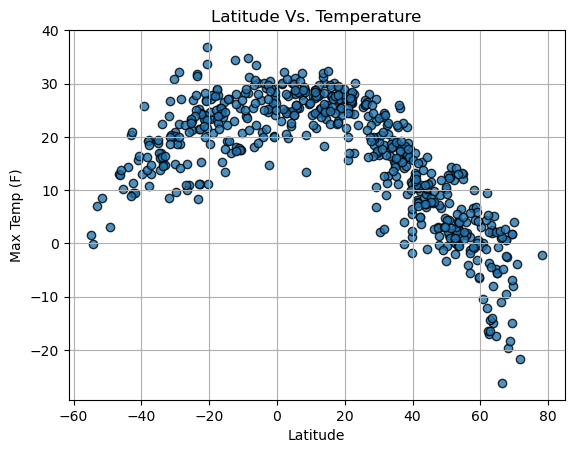

In [18]:
# Build scatter plot for latitude vs. temperature


# Incorporate the other graph properties
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities')
plt.title('Latitude Vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

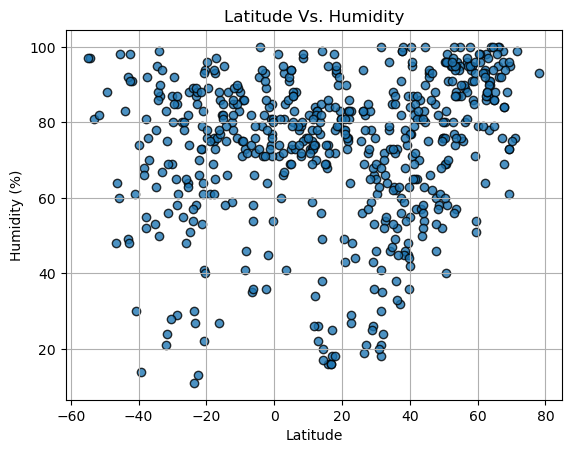

In [37]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

# Incorporate the other graph properties
plt.title('Latitude Vs. Humidity')
plt.scatter(x_axis, y_axis, 
           edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

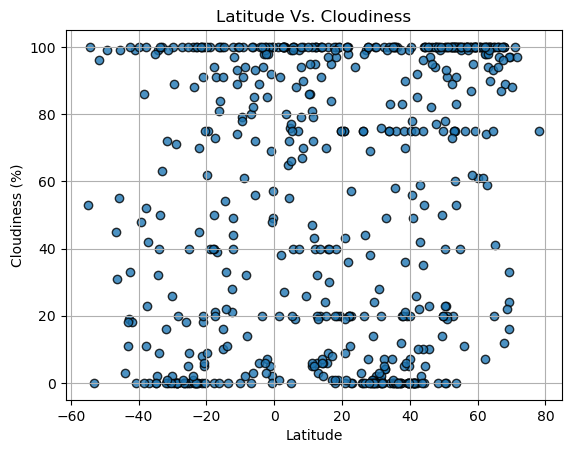

In [39]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.title('Latitude Vs. Cloudiness')
plt.scatter(x_axis, y_axis,  edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

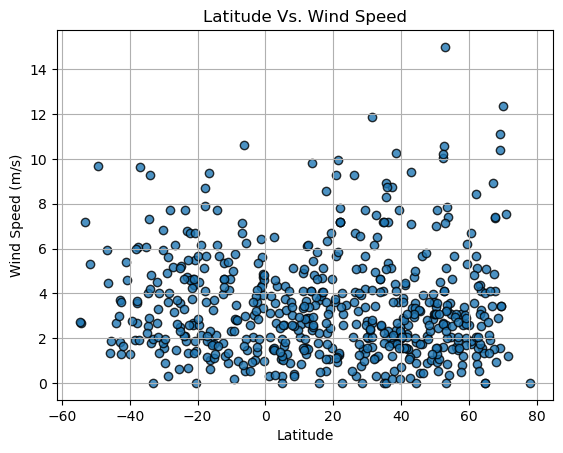

In [41]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.title('Latitude Vs. Wind Speed')
plt.scatter(x_axis, y_axis,  
            edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-square value is: 0.0008943695740726844


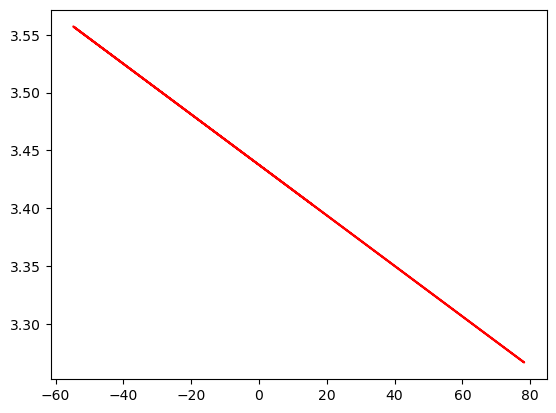

In [46]:
# Define a function to create Linear Regression plots
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis, y_axis)
regress_val = x_axis * slope + intercept
equation_line = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot (x_axis, regress_val,'r')
plt.annotate(equation_line,(5.8,0.8), fontsize = 12, color = 'blue')

#print out the r-square value along with the plot.
print(f'The r-square value is: {rvalue**2}')

The r-squared is: 0.36899858561054466


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cam ranh,11.9214,109.1591,27.98,74,40,1.54,VN,1730167800
3,ayvacik,39.6011,26.4047,11.58,45,0,2.50,TR,1730167803
4,porto novo,6.4965,2.6036,25.39,88,88,1.28,BJ,1730167804
6,suwayr,30.1171,40.3893,16.68,46,2,2.76,SA,1730167806
8,baloda bazar,21.6667,82.1667,24.46,76,36,1.24,IN,1730167808


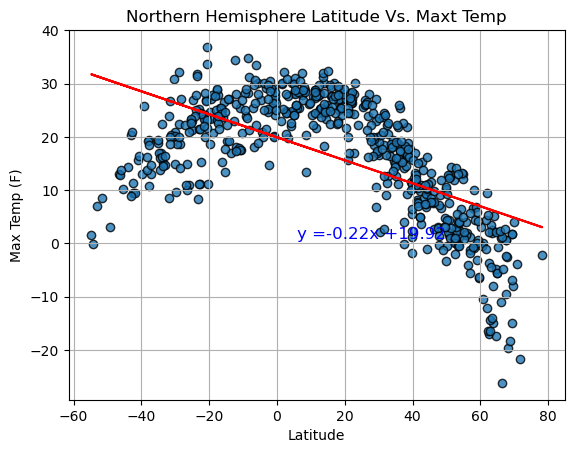

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =  city_data_df.loc[city_data_df['Lat']>= 0 ]

x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.title('Northern Hemisphere Latitude Vs. Maxt Temp')
plt.scatter(x_axis, y_axis,  
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()
plt.tight_layout

(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis, y_axis)
regress_val = x_axis * slope + intercept
equation_line = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot (x_axis, regress_val,'r')
plt.annotate(equation_line,(5.8,0.8), fontsize = 12, color = 'blue')
print(f"The r-squared is: {rvalue**2}")

# Display sample data
northern_hemi_df.head()

In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cam ranh,11.9214,109.1591,27.98,74,40,1.54,VN,1730167800
3,ayvacik,39.6011,26.4047,11.58,45,0,2.50,TR,1730167803
4,porto novo,6.4965,2.6036,25.39,88,88,1.28,BJ,1730167804
6,suwayr,30.1171,40.3893,16.68,46,2,2.76,SA,1730167806
8,baloda bazar,21.6667,82.1667,24.46,76,36,1.24,IN,1730167808


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.36899858561054466


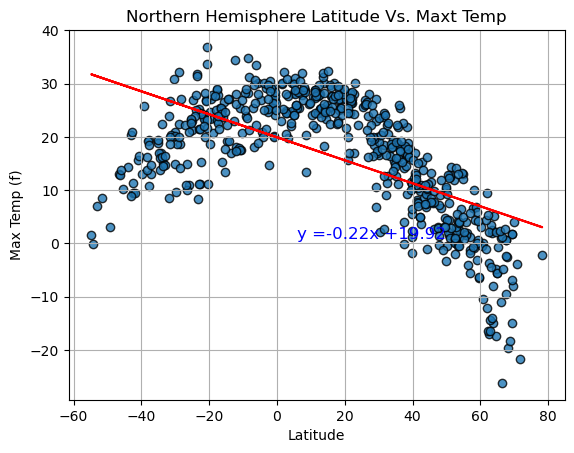

In [62]:
# Linear regression on Northern Hemisphere
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.title('Northern Hemisphere Latitude Vs. Maxt Temp')
plt.scatter(x_axis, y_axis,  
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.grid()
plt.tight_layout

(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis, y_axis)
regress_val = x_axis * slope + intercept
equation_line = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot (x_axis, regress_val,'r')
plt.annotate(equation_line,(5.8,0.8), fontsize = 12, color = 'blue')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.4028435174797408


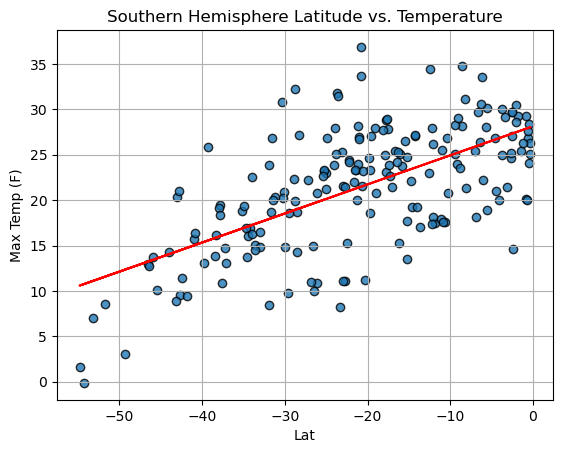

In [116]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]   
southern_hemi_df.head()

x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plt.title('Southern Hemisphere Latitude vs. Temperature' )
plt.scatter(x_axis, y_axis,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,)
plt.xlabel('Lat')
plt.ylabel('Max Temp (F)')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,90), fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** the linear relation ship is positive 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.026075448552649698


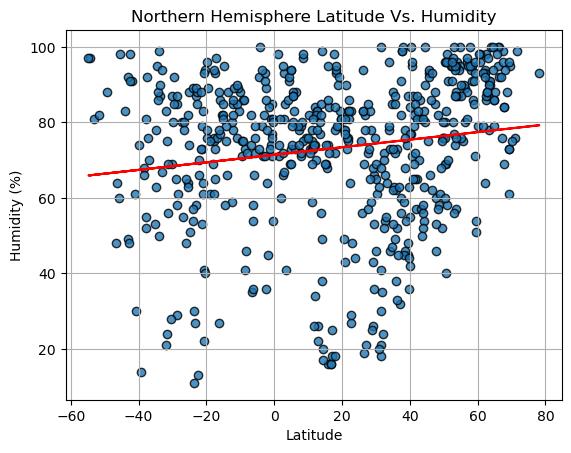

In [102]:
# Northern Hemisphere
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.title('Northern Hemisphere Latitude Vs. Humidity')
plt.scatter(x_axis, y_axis,  
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout

(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis, y_axis)
regress_val = x_axis * slope + intercept
equation_line = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot (x_axis, regress_val,'r')
plt.annotate(equation_line,(5.8,0.8), fontsize = 12, color = 'blue')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.003397565631395889


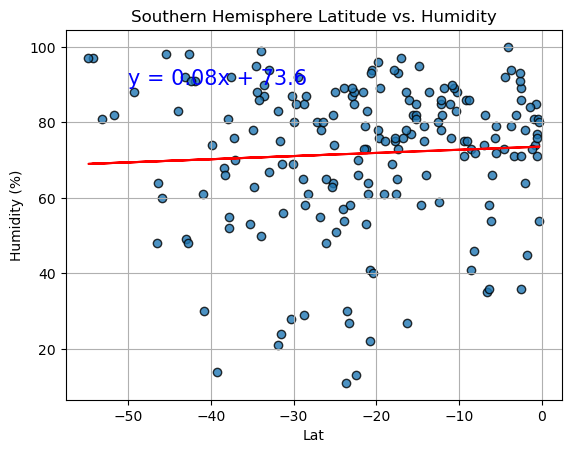

In [100]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]   
southern_hemi_df.head()

x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.scatter(x_axis, y_axis,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8, )
plt.xlabel('Lat')
plt.ylabel('Humidity (%)')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,90), fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** the linear relationship is slightly positive.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03509007339480644


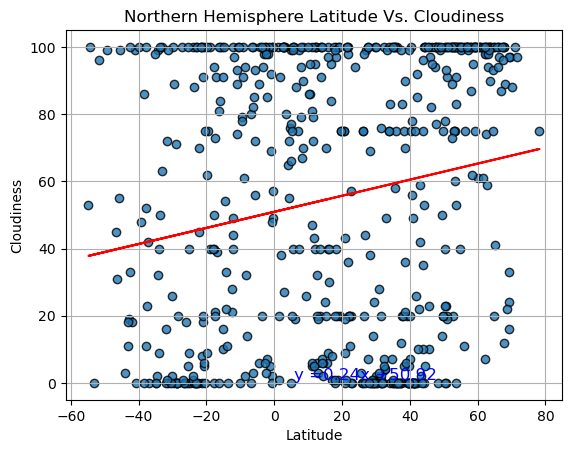

In [106]:
# Northern Hemisphere
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.title('Northern Hemisphere Latitude Vs. Cloudiness')
plt.scatter(x_axis, y_axis,  
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.tight_layout

(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis, y_axis)
regress_val = x_axis * slope + intercept
equation_line = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot (x_axis, regress_val,'r')
plt.annotate(equation_line,(5.8,0.8), fontsize = 12, color = 'blue')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.03274027492297629


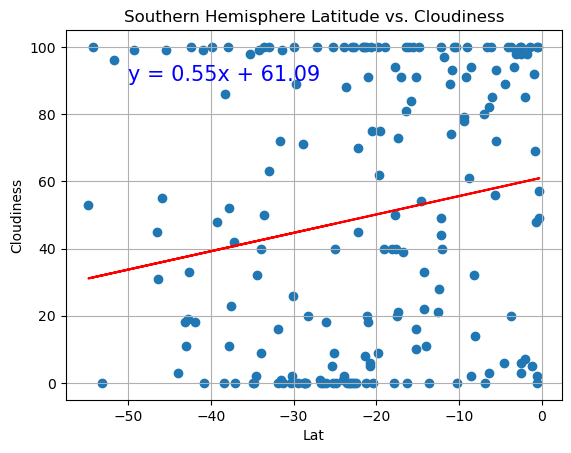

In [108]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]   
southern_hemi_df.head()

x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,90), fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** Linear relationship is positive.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0008943695740726844


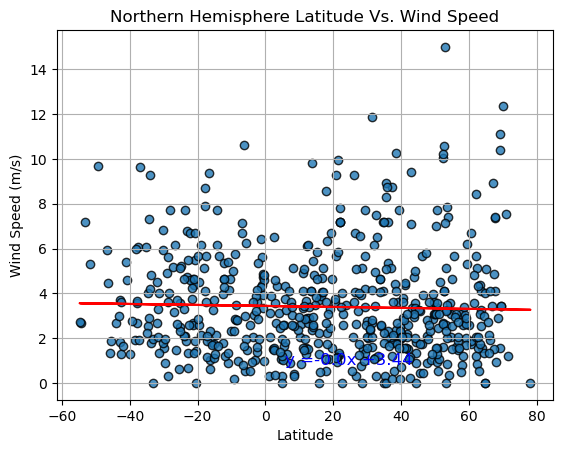

In [118]:
# Northern Hemisphere
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.title('Northern Hemisphere Latitude Vs. Wind Speed')
plt.scatter(x_axis, y_axis,  
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.tight_layout

(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis, y_axis)
regress_val = x_axis * slope + intercept
equation_line = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot (x_axis, regress_val,'r')
plt.annotate(equation_line,(5.8,0.8), fontsize = 12, color = 'blue')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.005558088770014447


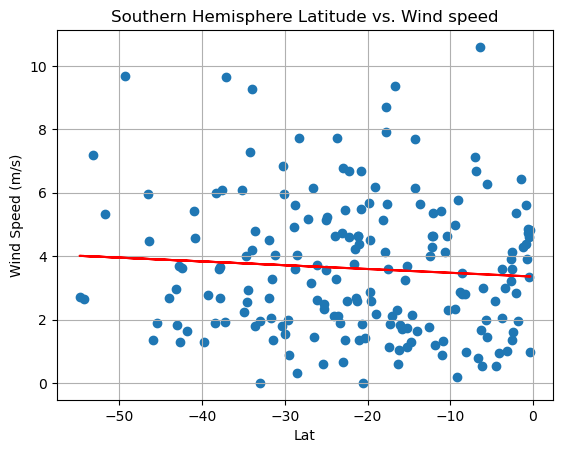

In [120]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]   
southern_hemi_df.head()

x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plt.title('Southern Hemisphere Latitude vs. Wind speed')
plt.scatter(x_axis, y_axis)
plt.xlabel('Lat')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,90), fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")


**Discussion about the linear relationship:** Linear relationship is negative 